<a href="https://colab.research.google.com/github/shirinlatifi/pe-project/blob/master/OilSGkeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline

In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_excel('oil SG.xlsx')

In [ ]:
df.drop('Rs', axis=1, inplace=True)

In [ ]:
df

In [ ]:
def fillnanP(col):
    if pd.isnull(col):
      return (df['P']!=np.NAN).mean()
    else:
      return col

In [ ]:
# df['P'] = df['P'].fillna(df['P'].mean())
def fillnanT(col):
    if pd.isnull(col):
      return (df['T']!=np.NAN).mean()
    else:
      return col

In [ ]:
df['P'] = df['P'].apply(fillnanP)

In [ ]:
df['T'] = df['T'].apply(fillnanT)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.corr()

,T,P,Sgo
T,1.000000,0.521808,-0.507691
P,0.521808,1.000000,-0.414561
Sgo,-0.507691,-0.414561,1.000000


In [ ]:
df.corr()['Sgo']

T     -0.507691
P     -0.414561
Sgo    1.000000
Name: Sgo, dtype: float64

<Axes: xlabel='P', ylabel='Sgo'>

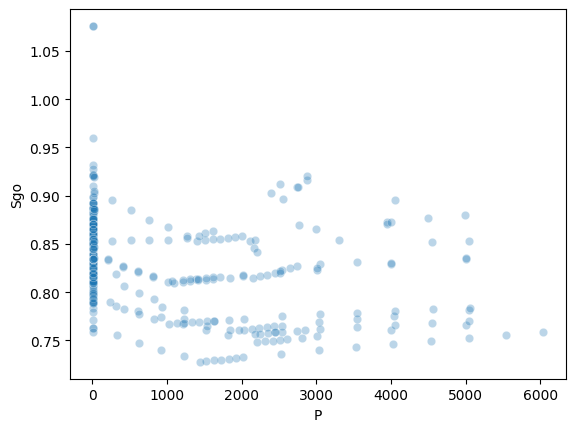

In [ ]:
sns.scatterplot(data=df, x='P', y='Sgo', alpha=0.3)

<Axes: xlabel='T', ylabel='Sgo'>

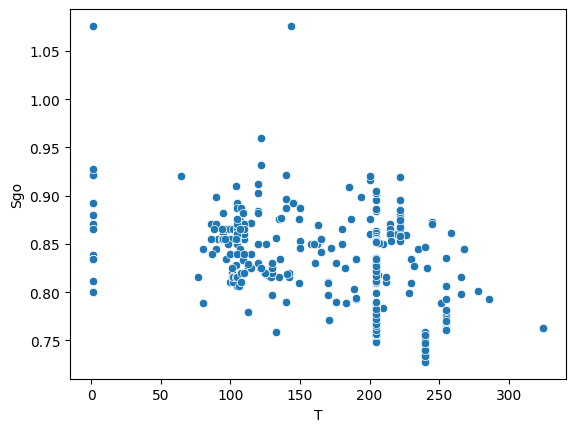

In [ ]:
sns.scatterplot(data=df, x='T', y='Sgo')

<Axes: xlabel='T', ylabel='P'>

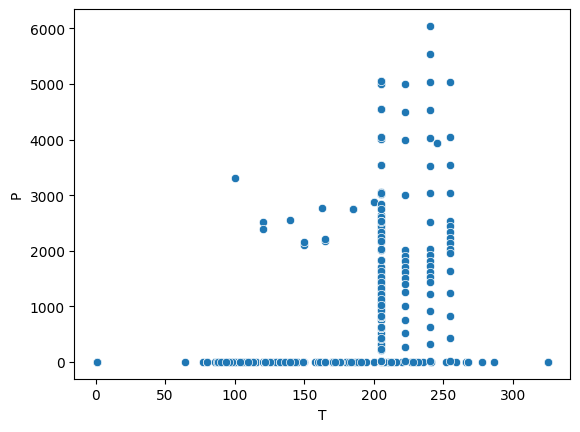

In [ ]:
sns.scatterplot(data=df, x='T', y='P')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       480 non-null    float64
 1   P       480 non-null    float64
 2   Sgo     480 non-null    float64
dtypes: float64(3)
memory usage: 15.0 KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(df.drop('Sgo', axis=1), df['Sgo'], test_size=0.1, random_state=100)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.max()

1.0

In [ ]:
X_train.min()

0.0

In [ ]:
X_test.max()

1.0

In [ ]:
X_test.min()

0.0

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# df['P'] = scaled_X[:, 1]

In [ ]:
# df['T'] = scaled_X[:, 0]

In [ ]:
df

In [ ]:
sns.pairplot(df)

# keras modeling

In [ ]:
import scipy as sc

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
# help(Sequential)

# creat first hidden layer

In [ ]:
model = Sequential([
    Dense(units=16, input_shape=(2,), activation='relu'),
    Dropout(0.2), # Adding dropout regularization
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=2, activation='softmax'),
     Dense(units=1)
])

In [ ]:
model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


#Getting Model Ready To Fit

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['accuracy'])

#Fitting The Model

###model.fit(x= , y= , batch_size= , epochs= ,validation_split= , shuffle= , verbose= )

In [ ]:
model.fit(x=X_train,
          y=y_train,
          batch_size=300,
          validation_split=0.1,
          epochs=1000,
          #shuffle=True,
          verbose=2)

In [ ]:
# pd.DataFrame(model.history.history).plot()

# predict

In [ ]:
predictions = model.predict(x=X_test, batch_size=100, verbose=2)

1/1 - 0s - 116ms/epoch - 116ms/step


In [ ]:
predictions

In [ ]:
predictions.shape

(48, 1)

In [ ]:
y_test.shape

(48,)

#evaluate

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 16ms/step - loss: 0.1383 - accuracy: 0.0000e+00


[0.13830579817295074, 0.0]

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error , mean_squared_error
mean_squared_error(y_test.values, predictions)

0.1383058077429204

In [ ]:
mean_absolute_error(y_test.values, predictions)

0.36924867242485826

In [ ]:
#  rmse = np.sqrt(mean_squared_error(y_test.values, predictions))
mean_squared_error(y_test.values, predictions, squared =False)

0.3718948880300997

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.round(), predictions.round(), normalize=False)

0